# Теорія ймовірності в контексті аналізу даних

In [3]:
import random
import math
import numpy as np
from collections import Counter

In [4]:
pX = {1: 0.1, 2: 0.5, 3:0.4}
pWeather = {"sunny": 0.3, "rainy":0.2, "cloudy":0.4, "snowy":0.1}
print(pWeather["sunny"])

0.3


Example: Tossing a fair coin

In [5]:
# Simulate 10 tosses
tosses = [random.choice(["H", "T"]) for _ in range(10)]
print(tosses)

# Empirical probability of Heads
p_heads = tosses.count("H") / len(tosses)
print(f"P(Heads) ≈ {p_heads:.2f}")

['H', 'T', 'T', 'H', 'H', 'H', 'H', 'T', 'T', 'T']
P(Heads) ≈ 0.50


**Law of Large Numbers**

Let's see how empirical probability approaches theoretical probability.

In [ ]:
def simulate_coin(n_tosses=1000):
    tosses = [random.choice(["H", "T"]) for _ in range(n_tosses)]
    return tosses.count("H") / n_tosses

for n in [10, 100, 1000, 10000]:
    print(f"{n} tosses → P(Heads) ≈ {simulate_coin(n):.3f}")

# As the number of tosses increases → probability stabilizes near 0.5.

10 tosses → P(Heads) ≈ 0.200
100 tosses → P(Heads) ≈ 0.580
1000 tosses → P(Heads) ≈ 0.496
10000 tosses → P(Heads) ≈ 0.500


## Using NumPy for Probability Distributions

**Uniform Distribution**

In [7]:
import numpy as np

# Generate random numbers between 0 and 1
samples = np.random.rand(5)
print(samples)

# Empirical probability of a value < 0.5
p = np.mean(samples < 0.5)
print("P(X < 0.5) ≈", p)

[0.75955599 0.02132349 0.45415367 0.32714836 0.93499247]
P(X < 0.5) ≈ 0.6


**Гаусівський розподіл (Normal (Gaussian) Distribution)**

Гаусівський розподіл є розподілом по дійсних числах і, ймовірно, є найпоширенішим розподілом у науці про дані (я не кажу, що це найпоширеніший розподіл у самих даних, а в науці про дані як галузі). Це пояснюється багатьма приємними властивостями розподілу: він легко інтегрується, має природний багатовимірний аналог, а також тим фактом, про який ми поговоримо в декількох лекціях, що певні розподіли даних середніх значень вибірки мають тенденцію до гаусівського розподілу (так звана центральна гранична теорема). Гаусівський розподіл має «дзвоноподібну» функцію щільності, яка, ймовірно, знайома багатьом людям.


Mean: -0.002846126267790618
Std Dev: 0.9992466721005764


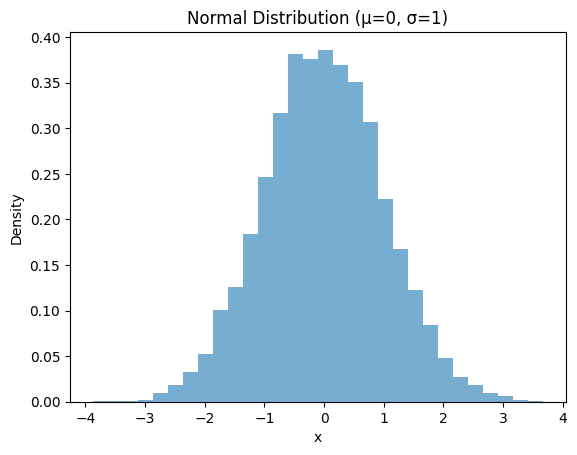

In [8]:
samples = np.random.normal(loc=0, scale=1, size=10000)  # mean=0, std=1
print("Mean:", np.mean(samples))
print("Std Dev:", np.std(samples))

import matplotlib.pyplot as plt

plt.hist(samples, bins=30, density=True, alpha=0.6)
plt.title("Normal Distribution (μ=0, σ=1)")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

**Discrete Distributions (Binomial Example)**

P(X=3) = 0.1172
P(X ≤ 3) = 0.1719


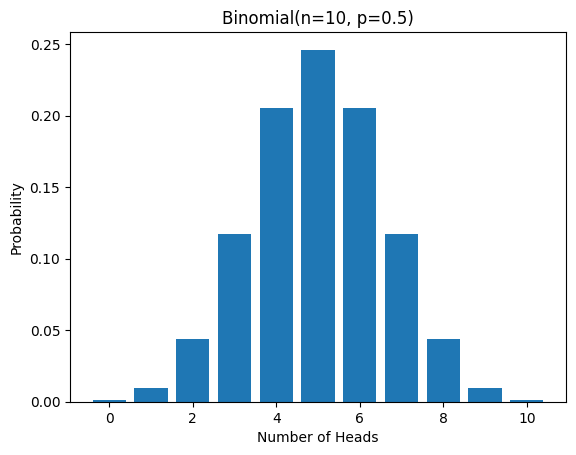

In [9]:
from scipy.stats import binom

# Parameters
n = 10   # number of trials
p = 0.5  # probability of success

# Probability of exactly 3 heads in 10 tosses
prob = binom.pmf(k=3, n=n, p=p)
print(f"P(X=3) = {prob:.4f}")

# Cumulative probability P(X ≤ 3)
cum_prob = binom.cdf(k=3, n=n, p=p)
print(f"P(X ≤ 3) = {cum_prob:.4f}")

x = np.arange(0, 11)
y = binom.pmf(x, n, p)

plt.bar(x, y)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.title("Binomial(n=10, p=0.5)")
plt.show()

## Bayes’ Theorem



In [10]:
# Let’s compute probability of disease given a positive test result.
# 1% of population has disease → P(Disease) = 0.01
# Test is 99% accurate →
# P(Pos | Disease) = 0.99
# P(Pos | No Disease) = 0.01
# Compute P(Disease | Pos):

P_D = 0.01
P_Pos_given_D = 0.99
P_Pos_given_notD = 0.01

# Total probability of positive test
P_Pos = P_Pos_given_D * P_D + P_Pos_given_notD * (1 - P_D)

# Bayes formula
P_D_given_Pos = (P_Pos_given_D * P_D) / P_Pos
print(f"P(Disease | Positive Test) = {P_D_given_Pos:.3f}")

# Only ~50% even with a “99% accurate” test — the base rate matters!

P(Disease | Positive Test) = 0.500
